In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cement = pd.read_csv('../Datasets/cement_slump.csv')

In [3]:
cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


## #Data Visualization

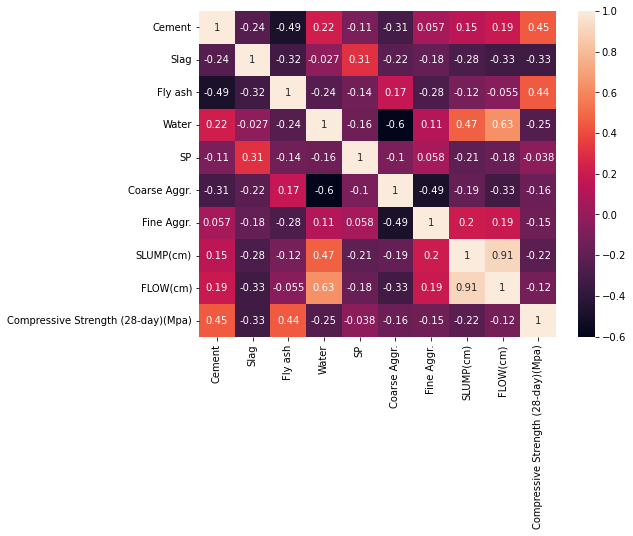

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(cement.corr(),annot=True)
plt.show()

In [5]:
cement.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## #Spliting data

In [6]:
X = cement.drop('Compressive Strength (28-day)(Mpa)',axis=1) 
y=cement['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.12)

In [8]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sclar = StandardScaler()

In [9]:
X_train_sclar = sclar.fit_transform(X_train)
X_test_sclar = sclar.transform(X_test)

## #SVM-Regression

In [10]:
from sklearn.svm import SVR
model_svr = SVR(C=2.5,kernel='linear',degree=3)

In [11]:
model_svr.fit(X_train_sclar,y_train)

SVR(C=2.5, kernel='linear')

In [12]:
svr_pred =model_svr.predict(X_test_sclar)

## #Model Evaluation

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [16]:
r2_score(y_test,svr_pred)

0.8303909800981734

In [18]:
mean_absolute_error(y_test,svr_pred)

2.464868080430645

In [19]:
mean_squared_error(y_test,svr_pred)

7.945761269580728

## #GridSearchCV

In [34]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1,1.5,2.0],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svm = SVR()

In [36]:
grid_model = GridSearchCV(svm,param_grid=param_grid)

In [37]:
grid_model.fit(X_train_sclar,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2.0],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [38]:
grid_model.best_params_

{'C': 1.5, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [39]:
grid_pred = grid_model.predict(X_test_sclar)

In [40]:
r2_score(y_test,grid_pred)

0.8484052388314026

In [41]:
mean_squared_error(y_test,grid_pred)

7.101837995774003

In [42]:
mean_absolute_error(y_test,grid_pred)

2.169868097434887